In [1]:
import pandas as pd

In [2]:
energy_index = pd.read_csv("../data/Global price of Energy index.csv")

In [3]:
energy_index.DATE = pd.to_datetime(energy_index.DATE)

In [4]:
energy_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        370 non-null    datetime64[ns]
 1   PNRGINDEXM  370 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [5]:
energy_index

,DATE,PNRGINDEXM
0,1992-01-01,44.452235
1,1992-02-01,44.012857
2,1992-03-01,43.828585
3,1992-04-01,46.155698
4,1992-05-01,48.205262
...,...,...
365,2022-06-01,328.123480
366,2022-07-01,343.809997
367,2022-08-01,376.412083
368,2022-09-01,330.149586


In [6]:
energy_index["Monthly Change"] = energy_index["PNRGINDEXM"].pct_change()

<AxesSubplot: ylabel='Density'>

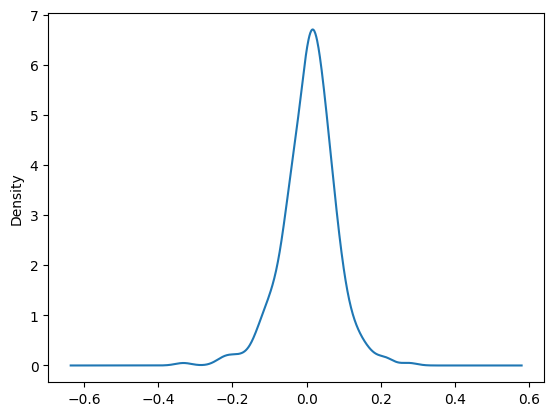

In [7]:
energy_index["Monthly Change"].plot(kind="kde")

In [8]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

data = energy_index["Monthly Change"].dropna().to_numpy().reshape(-1,1)
data.shape

kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(data)

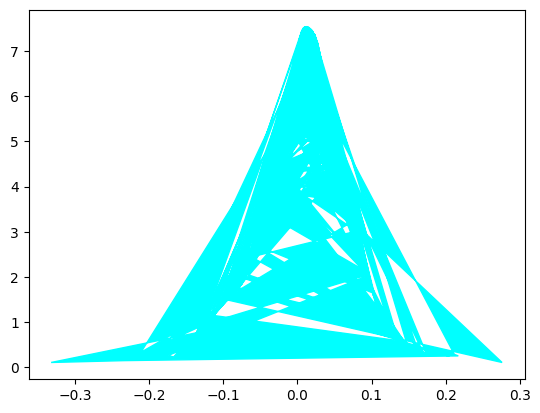

In [9]:
import numpy as np
log_dens = kde.score_samples(data)
plt.fill(data, np.exp(log_dens), c="cyan")

In [10]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(energy_index["Monthly Change"].dropna())
sd = np.std(energy_index["Monthly Change"].dropna())

In [11]:
pdf = normal_dist(data, mean, sd)

In [12]:
data = energy_index["Monthly Change"].dropna()

In [13]:
print(energy_index["Monthly Change"])
print(mean)
print(sd)

0           NaN
1     -0.009884
2     -0.004187
3      0.053096
4      0.044405
         ...   
365    0.069939
366    0.047807
367    0.094826
368   -0.122904
369   -0.212906
Name: Monthly Change, Length: 370, dtype: float64
0.007397474302866348
0.07121105220210606


Text(0, 0.5, 'Probability Density')

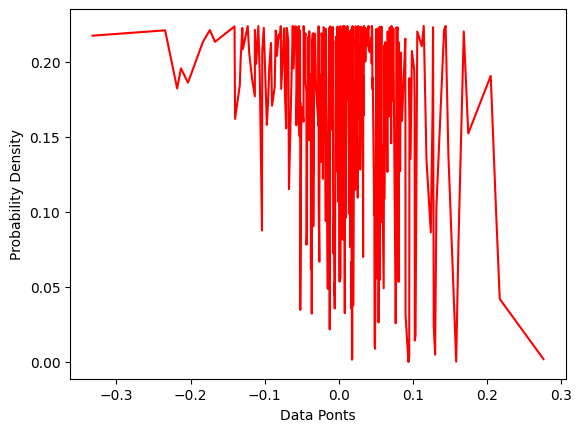

In [14]:
plt.plot(energy_index["Monthly Change"][1:].sort_values(), pdf, color="red")
plt.xlabel("Data Ponts")
plt.ylabel("Probability Density")

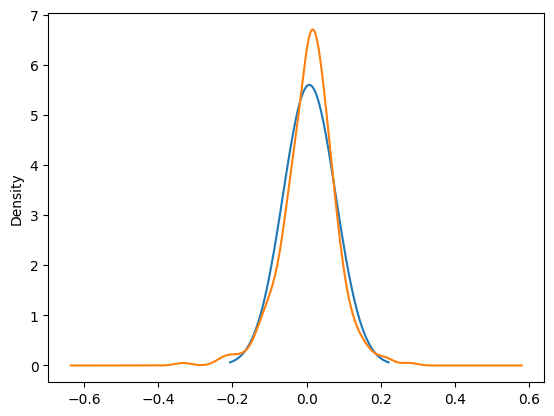

array([0.0622354 , 0.07450793, 0.08887351, 0.1056202 , 0.12506229,
       0.14754028, 0.17342017, 0.20309228, 0.23696926, 0.27548338,
       0.31908294, 0.3682278 , 0.42338391, 0.48501696, 0.55358498,
       0.62953004, 0.71326912, 0.80518407, 0.90561108, 1.01482948,
       1.13305036, 1.2604051 , 1.39693398, 1.54257543, 1.69715588,
       1.8603808 , 2.03182717, 2.21093753, 2.39701623, 2.58922787,
       2.7865983 , 2.98801833, 3.19225034, 3.39793778, 3.60361758,
       3.80773546, 4.0086638 , 4.20472208, 4.39419931, 4.57537825,
       4.74656082, 4.90609431, 5.05239772, 5.18398771, 5.2995036 ,
       5.39773073, 5.47762168, 5.53831494, 5.57915025, 5.59968068,
       5.59968068, 5.57915025, 5.53831494, 5.47762168, 5.39773073,
       5.2995036 , 5.18398771, 5.05239772, 4.90609431, 4.74656082,
       4.57537825, 4.39419931, 4.20472208, 4.0086638 , 3.80773546,
       3.60361758, 3.39793778, 3.19225034, 2.98801833, 2.7865983 ,
       2.58922787, 2.39701623, 2.21093753, 2.03182717, 1.86038

In [15]:
import scipy.stats as stats
import math

x = np.linspace(mean- 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
energy_index["Monthly Change"].plot(kind="kde")
plt.show()
stats.norm.pdf(x, mean, sd)

In [16]:
# Our integral approximation function
def integral_approximation(f, a, b):
    return (b-a)*np.mean(f)

# Integrate f(x) = x^2
def f1(x):
    return x**2

# Define bounds of integral
a = mean - sd
b = mean + sd

x_range = np.arange(a,b+0.0001,.0001)
fx = f1(x_range)
fx = stats.norm.pdf(x_range, mean, sd)

approx = integral_approximation(fx, a, b)
approx

0.6824411414066164

In [17]:
import seaborn as sns

In [18]:
data

1     -0.009884
2     -0.004187
3      0.053096
4      0.044405
5      0.050719
         ...   
365    0.069939
366    0.047807
367    0.094826
368   -0.122904
369   -0.212906
Name: Monthly Change, Length: 369, dtype: float64

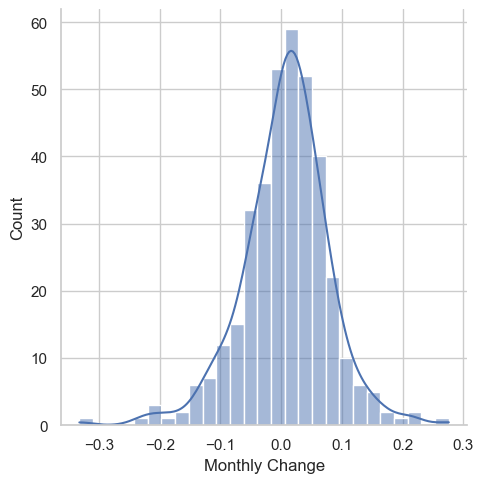

In [19]:
sns.set_theme(style="whitegrid")
sns.displot(data, kde=True)

In [20]:
from sklearn.neighbors import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


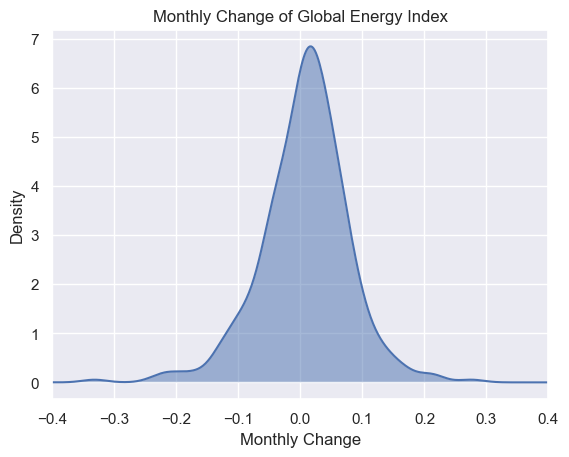

In [32]:
X_plot = np.linspace(-1, 1, 1000)[:, np.newaxis]

X = energy_index["Monthly Change"].dropna().to_numpy()[:,np.newaxis]

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.02).fit(X)
log_dens = kde.score_samples(X_plot)

sns.set_theme(style="darkgrid")
plt.fill_between(np.linspace(-1, 1, 1000), np.exp(log_dens), alpha=0.5)
plt.xlim([-0.4,0.4])
plt.xlabel("Monthly Change")
plt.ylabel("Density")
plt.title("Monthly Change of Global Energy Index")
plt.plot(X_plot[:,0], np.exp(log_dens))

In [34]:
print(f"Expected value: {X.mean()}")
print(f"Standard Deviation: {sd}")

Expected value: 0.007397474302866348
Standard Deviation: 0.07121105220210606


In [23]:
print(a, b)
log_dens = kde.score_samples(X_plot)
print(np.exp(log_dens)[500:])
integral_approximation(np.exp(log_dens), -1, 1)

-0.06381357789923972 0.07860852650497241
[6.39753507e+00 6.44919772e+00 6.49829708e+00 6.54466047e+00
 6.58812598e+00 6.62854360e+00 6.66577615e+00 6.69970002e+00
 6.73020589e+00 6.75719914e+00 6.78060028e+00 6.80034512e+00
 6.81638483e+00 6.82868594e+00 6.83723008e+00 6.84201374e+00
 6.84304783e+00 6.84035715e+00 6.83397983e+00 6.82396661e+00
 6.81038007e+00 6.79329382e+00 6.77279162e+00 6.74896643e+00
 6.72191946e+00 6.69175917e+00 6.65860024e+00 6.62256260e+00
 6.58377032e+00 6.54235067e+00 6.49843307e+00 6.45214814e+00
 6.40362673e+00 6.35299905e+00 6.30039379e+00 6.24593733e+00
 6.18975302e+00 6.13196051e+00 6.07267513e+00 6.01200746e+00
 5.95006284e+00 5.88694104e+00 5.82273607e+00 5.75753597e+00
 5.69142276e+00 5.62447247e+00 5.55675522e+00 5.48833542e+00
 5.41927204e+00 5.34961887e+00 5.27942496e+00 5.20873503e+00
 5.13758989e+00 5.06602698e+00 4.99408088e+00 4.92178380e+00
 4.84916612e+00 4.77625690e+00 4.70308433e+00 4.62967624e+00
 4.55606048e+00 4.48226531e+00 4.40831973e+0

1.9979999999999891

In [36]:
import scipy.integrate as integrate
kde.score_samples(np.array([1])[:, np.newaxis])

f = lambda x: np.exp(kde.score_samples(np.array([x])[:, np.newaxis]))

print(integrate.quad(f, a, b))
print(a)
print(b)

(0.7274917168853948, 1.4404172012432448e-14)
-0.06381357789923972
0.07860852650497241
